In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [304]:
# Load the datasets
account_data = pd.read_csv("Account Data.csv")
account_holder = pd.read_csv("Acount Holder Data.csv")
mule_flag = pd.read_csv("Mule Flag.csv")


### Dataset Understantanding and Initial Audit

In [305]:
# View the first five rows
account_data.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,ID_0001,19.0,NaN,305.0,230.0,288.0,39.0,7.0,2.0,0.0
1,ID_0002,3.0,24989.0,331.0,203.0,147.0,5.0,NaN,4.0,2.0
2,ID_0003,NaN,10915.0,109.0,43.0,227.0,37.0,4.0,1.0,1.0
3,ID_0004,19.0,43552.0,87.0,149.0,236.0,168.0,1.0,2.0,1.0
4,ID_0005,9.0,19990.0,NaN,49.0,37.0,99.0,9.0,3.0,2.0


In [306]:
# View the first five rows
account_holder.head()

,Identifier,DateOfBirth,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,NumDependents,SocialMediaUsageHours,ShoppingFrequencyPerMonth,HealthInsuranceStatus
0,ID_0001,06/01/1964,Female,96534.0,NaN,44116.0,Unemployed,Single,Owner,3.0,21.0,9.0,Yes
1,ID_0002,26/11/2004,Male,75106.0,390.0,9782.0,Unemployed,NaN,Owner,2.0,9.0,10.0,No
2,ID_0003,02/07/1992,Male,50678.0,779.0,38650.0,Student,Divorced,Owner,3.0,16.0,5.0,Yes
3,ID_0004,03/07/1974,Male,96218.0,757.0,22366.0,Student,Single,Owner,1.0,21.0,0.0,No
4,ID_0005,13/05/1976,Male,83230.0,750.0,28557.0,Employed,Single,Owner,1.0,11.0,5.0,No


In [307]:
# View the first five rows
mule_flag.head()

,Identifier,MuleAccount
0,ID_0001,0.0
1,ID_0002,0.0
2,ID_0003,NaN
3,ID_0004,NaN
4,ID_0005,0.0


In [308]:
# Get the structure of the data
account_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identifier          1000 non-null   object 
 1   AccountLength       948 non-null    float64
 2   AverageBalance      948 non-null    float64
 3   NumTransactions     948 non-null    float64
 4   NumDeposits         948 non-null    float64
 5   NumWithdrawals      948 non-null    float64
 6   NumTransfers        948 non-null    float64
 7   NumLoans            948 non-null    float64
 8   NumCreditCards      949 non-null    float64
 9   NumSavingsAccounts  948 non-null    float64
dtypes: float64(9), object(1)
memory usage: 78.3+ KB


In [309]:
# Get the structure of the data
account_holder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifier                 1045 non-null   object 
 1   DateOfBirth                991 non-null    object 
 2   Gender                     992 non-null    object 
 3   Income                     989 non-null    float64
 4   CreditScore                987 non-null    float64
 5   LoanAmount                 990 non-null    float64
 6   EmploymentStatus           987 non-null    object 
 7   MaritalStatus              989 non-null    object 
 8   OccupancyStatus            990 non-null    object 
 9   NumDependents              990 non-null    float64
 10  SocialMediaUsageHours      985 non-null    float64
 11  ShoppingFrequencyPerMonth  990 non-null    float64
 12  HealthInsuranceStatus      989 non-null    object 
dtypes: float64(6), object(7)
memory usage: 106.3+ KB

In [310]:
# Get the structure of the data
mule_flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifier   1000 non-null   object 
 1   MuleAccount  948 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [311]:
# Calculate percentage of blank (NaN or empty) values
account_data.isnull().mean() * 100

Identifier            0.0
AccountLength         5.2
AverageBalance        5.2
NumTransactions       5.2
NumDeposits           5.2
NumWithdrawals        5.2
NumTransfers          5.2
NumLoans              5.2
NumCreditCards        5.1
NumSavingsAccounts    5.2
dtype: float64

In [312]:
# Calculate percentage of blank (NaN or empty) values
account_holder.isnull().mean() * 100

Identifier                   0.000000
DateOfBirth                  5.167464
Gender                       5.071770
Income                       5.358852
CreditScore                  5.550239
LoanAmount                   5.263158
EmploymentStatus             5.550239
MaritalStatus                5.358852
OccupancyStatus              5.263158
NumDependents                5.263158
SocialMediaUsageHours        5.741627
ShoppingFrequencyPerMonth    5.263158
HealthInsuranceStatus        5.358852
dtype: float64

In [313]:
# Calculate percentage of blank (NaN or empty) values
mule_flag.isnull().mean() * 100

Identifier     0.0
MuleAccount    5.2
dtype: float64

In [314]:
# Check for dupes in account_data datframe
account_data.duplicated().sum()

0

In [315]:
# Check for dupes in account_data datframe
account_holder.duplicated().sum()

45

In [316]:
# View the duplicated rows in account_holder dataframe
account_holder[account_holder.duplicated(keep=False)]

,Identifier,DateOfBirth,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,NumDependents,SocialMediaUsageHours,ShoppingFrequencyPerMonth,HealthInsuranceStatus
60,ID_0061,30/06/1995,Female,98344.0,705.0,26027.0,Retired,NaN,Renter,3.0,10.0,24.0,No
61,ID_0061,30/06/1995,Female,98344.0,705.0,26027.0,Retired,NaN,Renter,3.0,10.0,24.0,No
99,ID_0099,02/05/1966,Male,41172.0,810.0,17197.0,Unemployed,Married,Owner,2.0,NaN,20.0,No
100,ID_0099,02/05/1966,Male,41172.0,810.0,17197.0,Unemployed,Married,Owner,2.0,NaN,20.0,No
110,ID_0109,15/01/1960,NaN,NaN,575.0,27052.0,NaN,Widowed,Renter,2.0,11.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,ID_0836,27/06/1959,Female,37014.0,319.0,7366.0,NaN,Widowed,Owner,4.0,NaN,27.0,Yes
884,ID_0842,22/11/1985,Male,53755.0,341.0,48639.0,Retired,Married,Owner,1.0,11.0,6.0,NaN
885,ID_0842,22/11/1985,Male,53755.0,341.0,48639.0,Retired,Married,Owner,1.0,11.0,6.0,NaN
969,ID_0926,30/12/1976,Male,25782.0,NaN,NaN,NaN,Widowed,Renter,1.0,17.0,26.0,No


In [317]:
# Check for dupes in mule_flag datframe
mule_flag.duplicated().sum()

0

In [318]:
# Check that the IDs are the same across the three files by converting them to sets and comparing
set(account_data['Identifier']) == set(account_holder['Identifier'])


True

In [319]:
set(account_data['Identifier']) == set(mule_flag['Identifier'])

True

In [320]:
mule_flag['MuleAccount'].value_counts()

MuleAccount
0.0    889
1.0     59
Name: count, dtype: int64

### Data Cleaning

In [321]:
# Handling mising values
def handle_missing_values(df):
    """
    Simple function to replace missing values:
    - Numerical columns: -1
    - Categorical columns and Datetimes: 'Missing'
    """
    
    # Numerical columns (int, float)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[num_cols] = df[num_cols].fillna(-1)
    
    # Categorical columns (object, category)
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna('Missing')
    
    return df

In [322]:
# Handle missing values in account_data
account_data = handle_missing_values(account_data)

# Confirm no more mising values
account_data.isnull().sum().sum()

0

In [323]:
# Handle missing values in account_holder
account_holder = handle_missing_values(account_holder)

# Confirm no more mising values
account_holder.isnull().sum().sum()

0

In [324]:
# Handle missing values in mule_flag
# The mule flag is very important because it is our outcome data and the quality of the analysis depends on it.
# For the purpose of this analysis, we are going to assume they are 0's because that is a larger pool and will affect the analysis less.
mule_flag = mule_flag.fillna(0)

# Confirm no more mising values
mule_flag.isnull().sum().sum()


0

In [325]:
# Handling incorrect data type
# Convert DateOfBirth column to datetime in the account_holder dataframe
account_holder['DateOfBirth'] = pd.to_datetime(account_holder['DateOfBirth'], format='%d/%m/%Y', errors='coerce') 

In [326]:
# Handling Duplicates
# Drop duplicates, keep first occurrence 
account_holder = account_holder.drop_duplicates()

In [327]:
# Confirm no more dupes
account_holder.duplicated().sum()

0

In [328]:
# Combine the three dataframes into one
combined_data = account_data.merge(account_holder 
                              ,how = 'left', 
                              on = 'Identifier') 

combined_data = combined_data.merge(mule_flag, 
                      how = 'left', 
                      on = 'Identifier')

In [329]:
combined_data.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts,...,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,NumDependents,SocialMediaUsageHours,ShoppingFrequencyPerMonth,HealthInsuranceStatus,MuleAccount
0,ID_0001,19.0,-1.0,305.0,230.0,288.0,39.0,7.0,2.0,0.0,...,-1.0,44116.0,Unemployed,Single,Owner,3.0,21.0,9.0,Yes,0.0
1,ID_0002,3.0,24989.0,331.0,203.0,147.0,5.0,-1.0,4.0,2.0,...,390.0,9782.0,Unemployed,Missing,Owner,2.0,9.0,10.0,No,0.0
2,ID_0003,-1.0,10915.0,109.0,43.0,227.0,37.0,4.0,1.0,1.0,...,779.0,38650.0,Student,Divorced,Owner,3.0,16.0,5.0,Yes,0.0
3,ID_0004,19.0,43552.0,87.0,149.0,236.0,168.0,1.0,2.0,1.0,...,757.0,22366.0,Student,Single,Owner,1.0,21.0,0.0,No,0.0
4,ID_0005,9.0,19990.0,-1.0,49.0,37.0,99.0,9.0,3.0,2.0,...,750.0,28557.0,Employed,Single,Owner,1.0,11.0,5.0,No,0.0


### Feature Engineering

In [330]:
# Create an age column using Date of Birth

# Create a variable for the current year
current_year = datetime.now().year
combined_data['Age'] = current_year - combined_data['DateOfBirth'].dt.year

In [331]:
# Create Age Group
# Define age bins and labels
bins = [0, 17, 24, 35, 45, 60, 100]  # Define bin edges
labels = ['0-17', '18-24', '25-35', '36-45', '46-60', '60+']

# Create age categories
combined_data['AgeGroup'] = pd.cut(combined_data['Age'], bins=bins, labels=labels, right=False)

In [332]:
# Create Income Group
# Define income bins and labels
bins = [0, 10000, 20000, 30000, 40000, 60000, 80000, 100000]  # Define bin edges
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-60k', '60k-80k','80k+']  # Define bin labels

# Create income categories
combined_data['IncomeGroup'] = pd.cut(combined_data['Income'], bins=bins, labels=labels, right=False)

In [333]:
# Create Transaction Ratios
combined_data['DepositToWithdrawalRatio'] = combined_data['NumDeposits'] / (combined_data['NumWithdrawals'] + 0.000001) # Add small epsilon to avoid division by zero
combined_data['TransferToTransactionRatio'] = combined_data['NumTransfers'] / (combined_data['NumTransactions'] + 0.000001)
combined_data['TransactionDensity'] = combined_data['NumTransactions'] / (combined_data['AccountLength'] + 0.000001)

# TransactionDensity: Measures how actively an account is used relative to how long it's been open
# DepositToWithdrawalRatio: Shows the balance between money coming in vs going out
# TransferToTransactionRatio: Proportion of transactions that are transfers to other accounts


In [343]:
combined_data['DepositToWithdrawalRatio']

0        0.798611
1        1.380952
2        0.189427
3        0.631356
4        1.324324
          ...    
995      0.586614
996   -134.000134
997      5.370370
998      1.865385
999      1.044248
Name: DepositToWithdrawalRatio, Length: 1000, dtype: float64

### Exploratory Data Analysis (EDA)

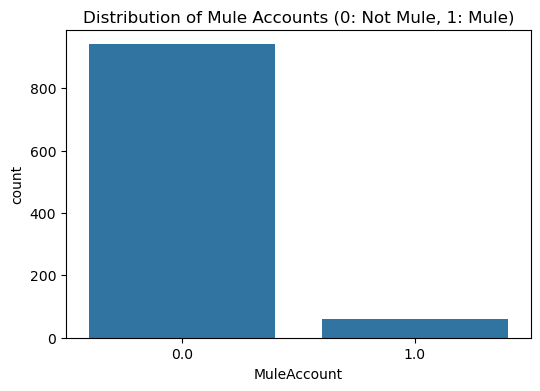

In [334]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='MuleAccount', data=combined_data)
plt.title('Distribution of Mule Accounts (0: Not Mule, 1: Mule)')
plt.show()

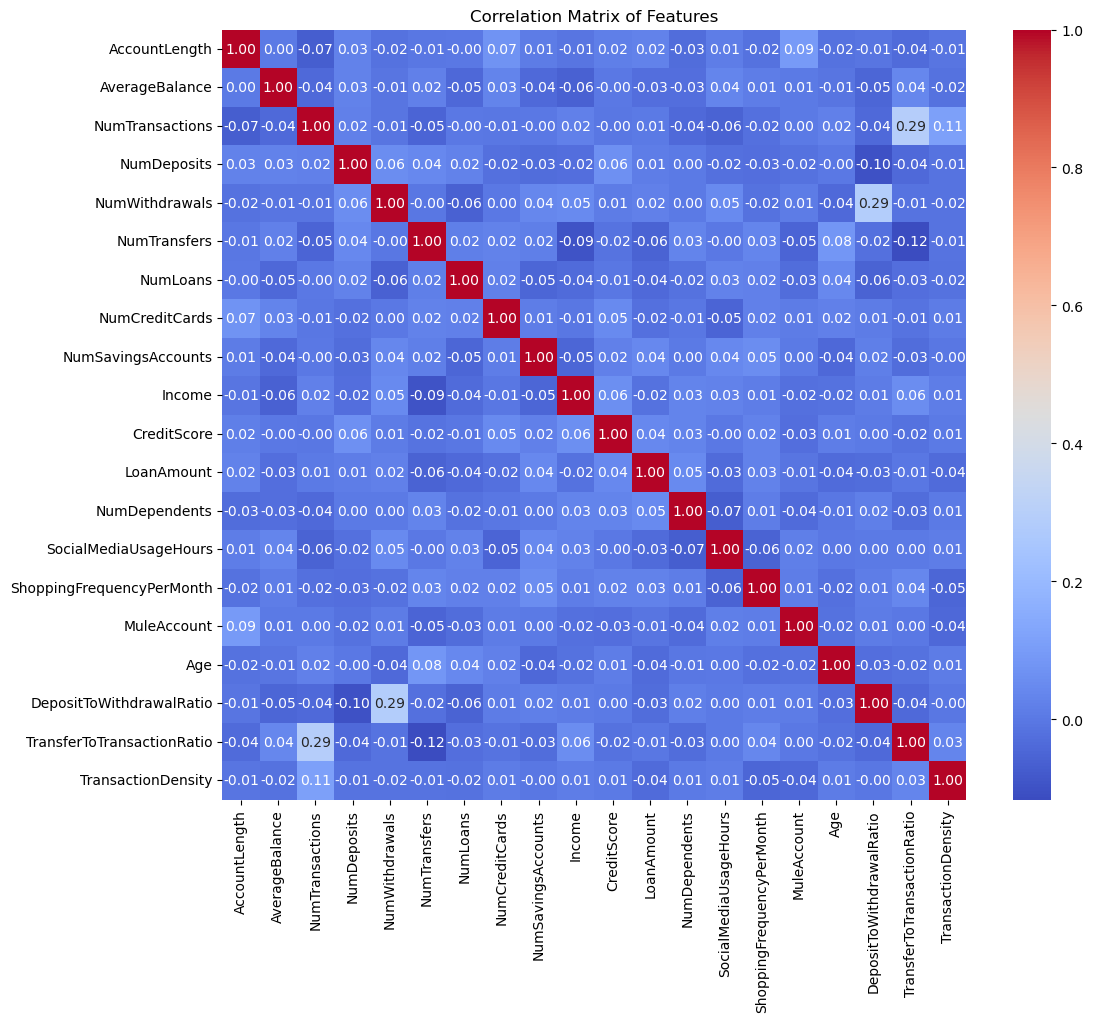

In [335]:
# Correlation Matrix (for numerical features)
plt.figure(figsize=(12, 10))
correlation_matrix = combined_data.drop('Identifier', axis=1).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features');

In [336]:
# Focus on correlations with target variable
target_correlations = correlation_matrix['MuleAccount'].sort_values(ascending=False)
target_correlations

MuleAccount                   1.000000
AccountLength                 0.093050
SocialMediaUsageHours         0.015048
ShoppingFrequencyPerMonth     0.010507
DepositToWithdrawalRatio      0.009765
NumWithdrawals                0.007742
NumCreditCards                0.007452
AverageBalance                0.005688
NumSavingsAccounts            0.003702
NumTransactions               0.002655
TransferToTransactionRatio    0.000944
LoanAmount                   -0.009902
Age                          -0.018893
NumDeposits                  -0.020235
Income                       -0.024471
CreditScore                  -0.027651
NumLoans                     -0.029329
NumDependents                -0.036403
TransactionDensity           -0.043853
NumTransfers                 -0.051076
Name: MuleAccount, dtype: float64

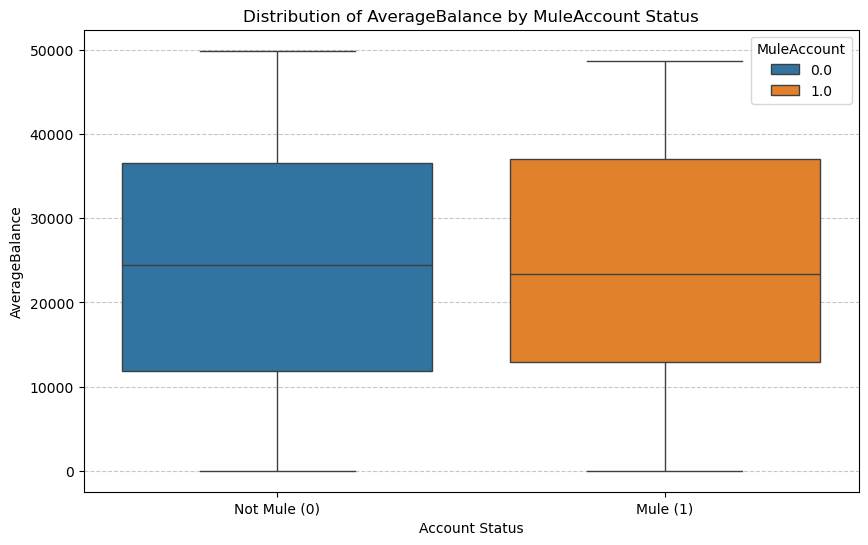

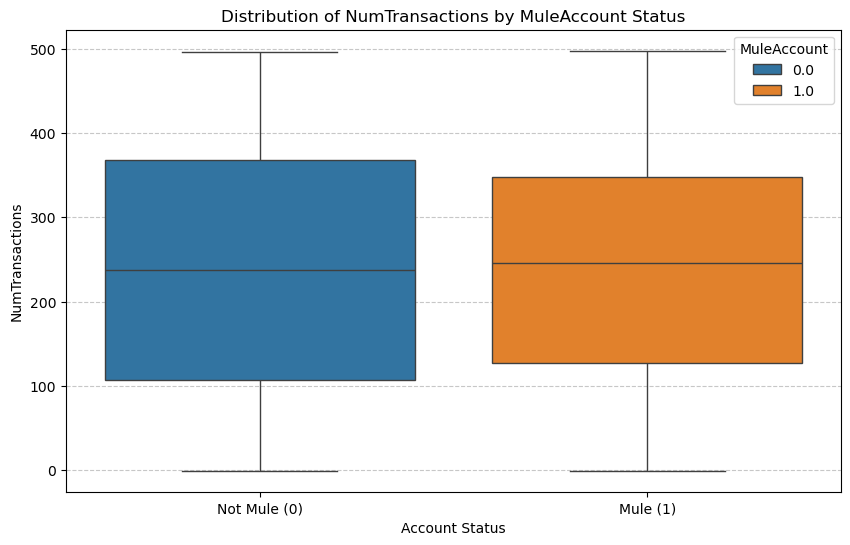

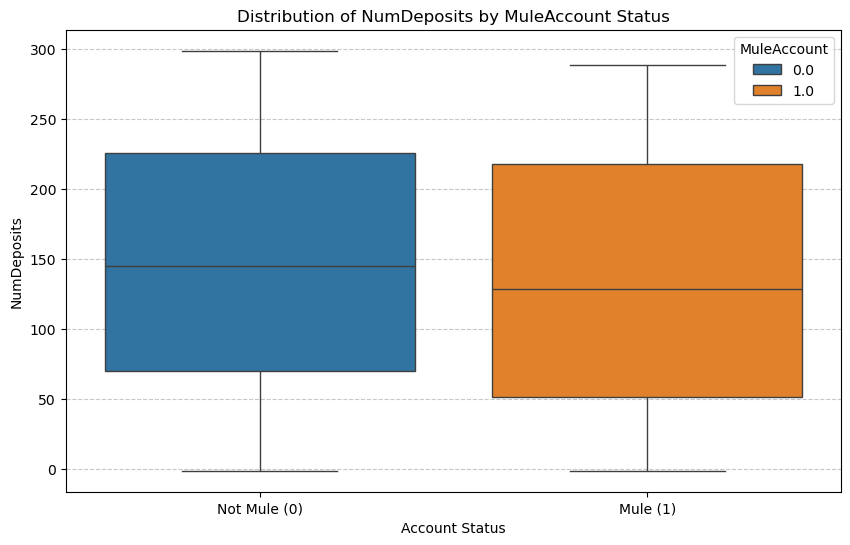

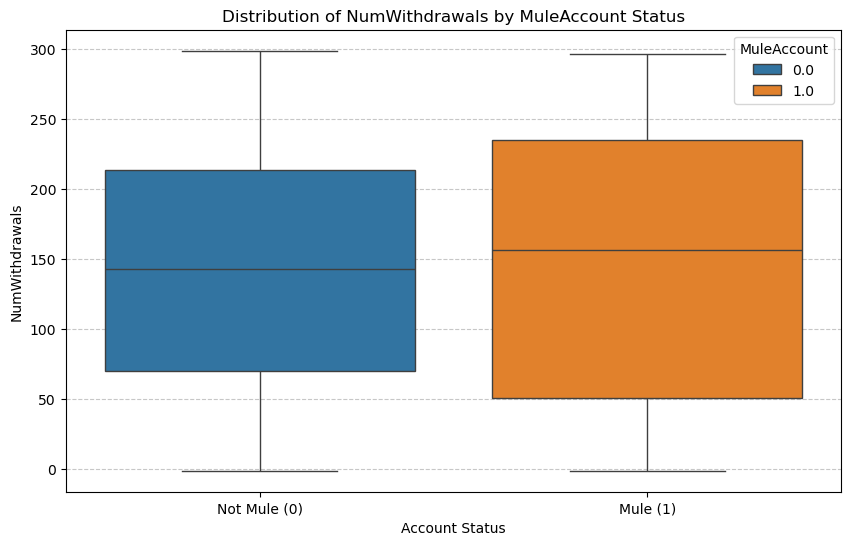

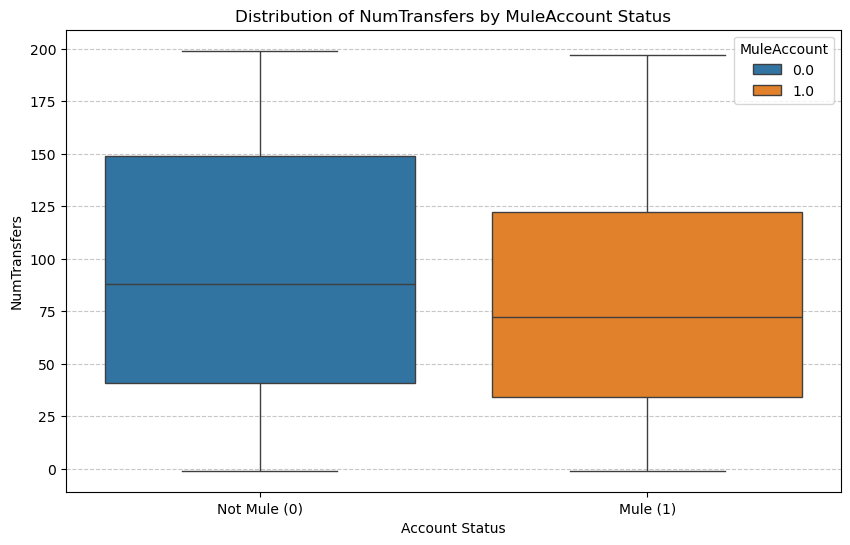

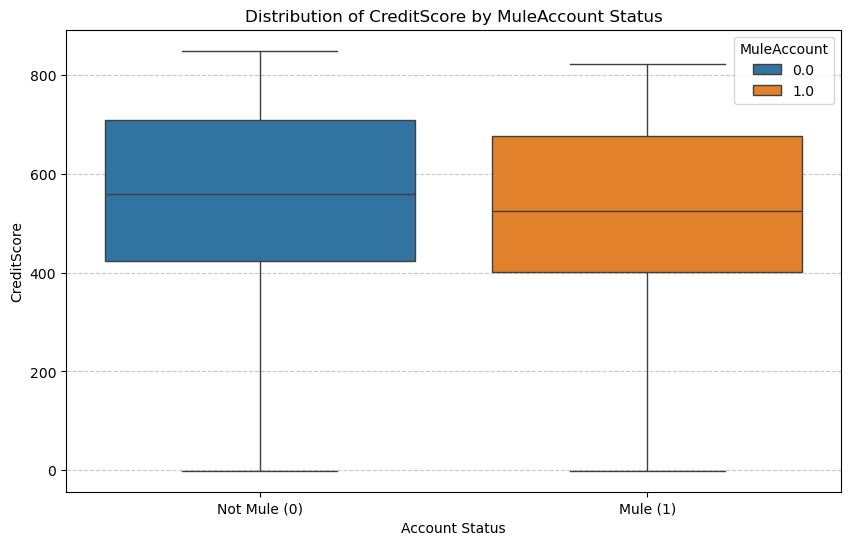

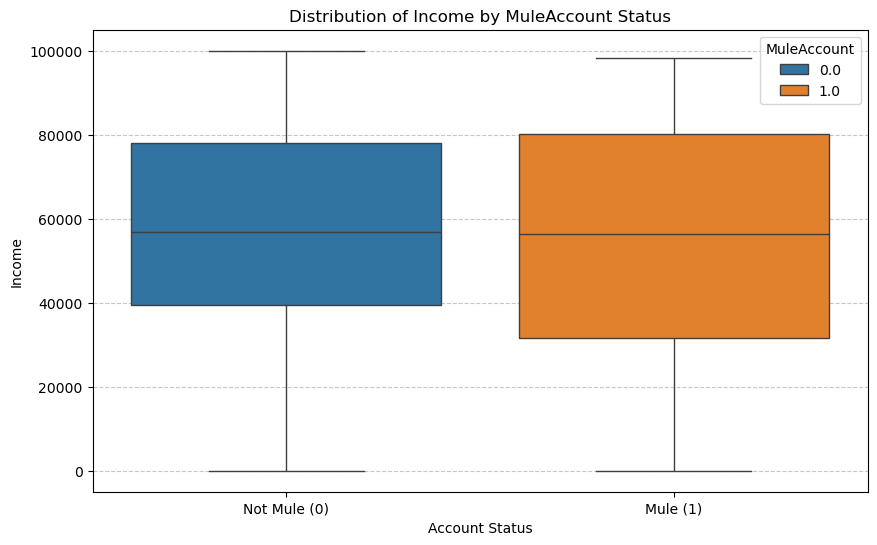

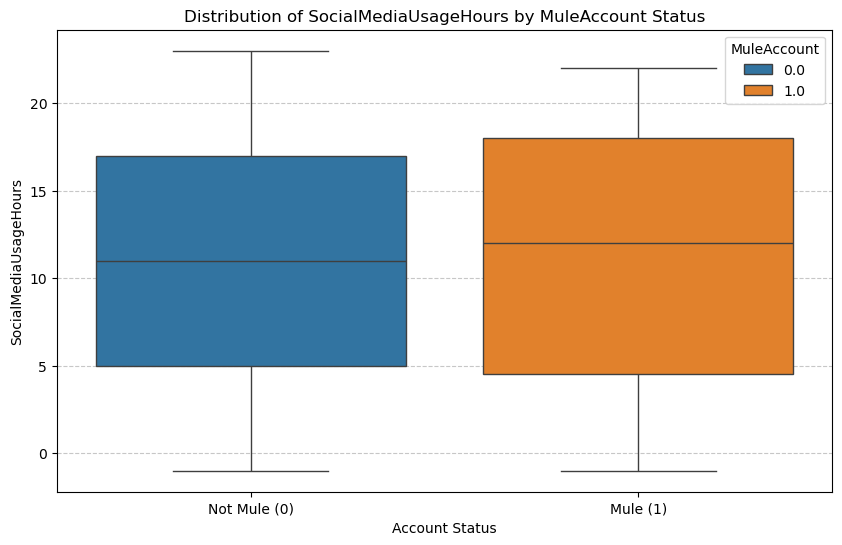

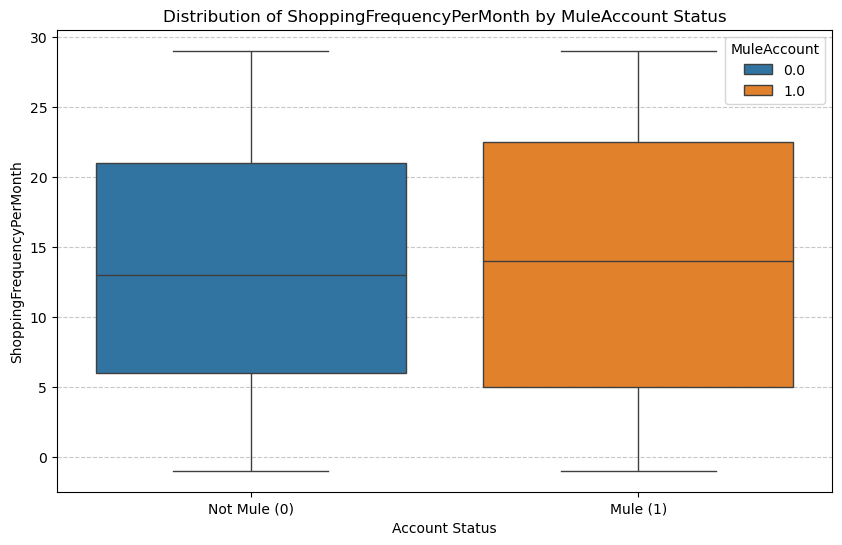

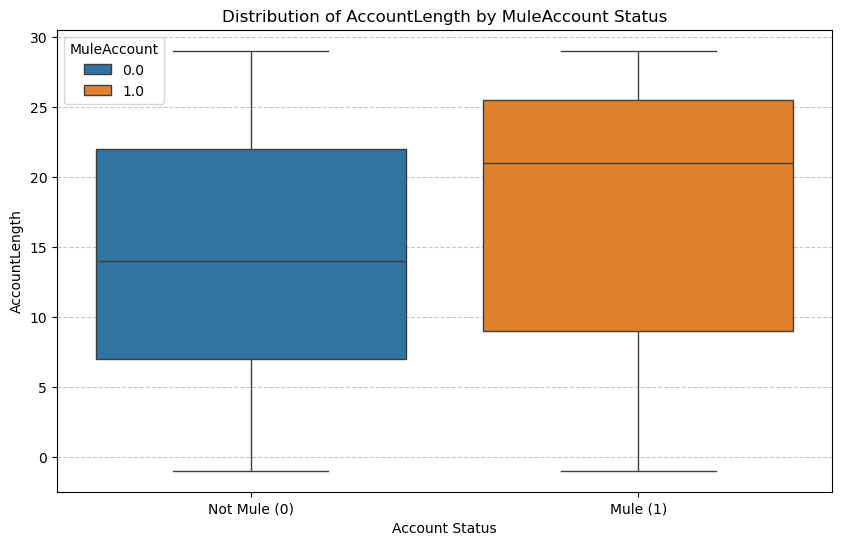

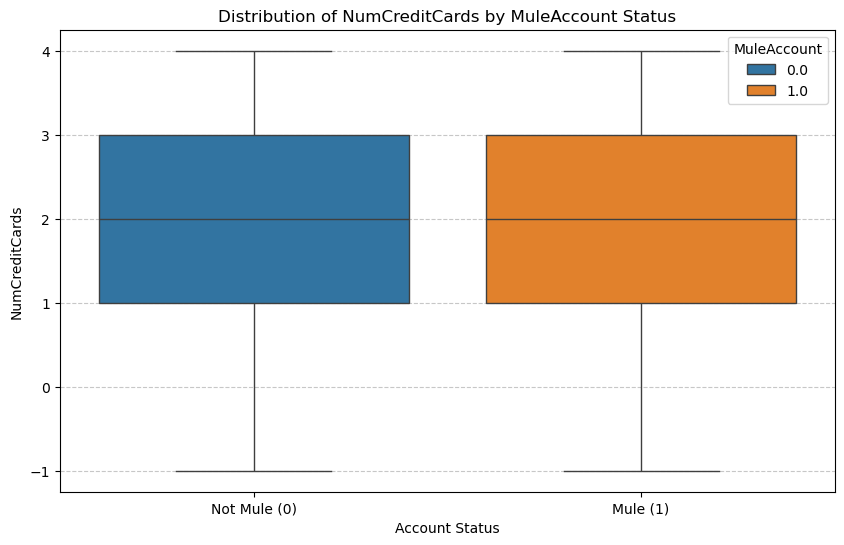

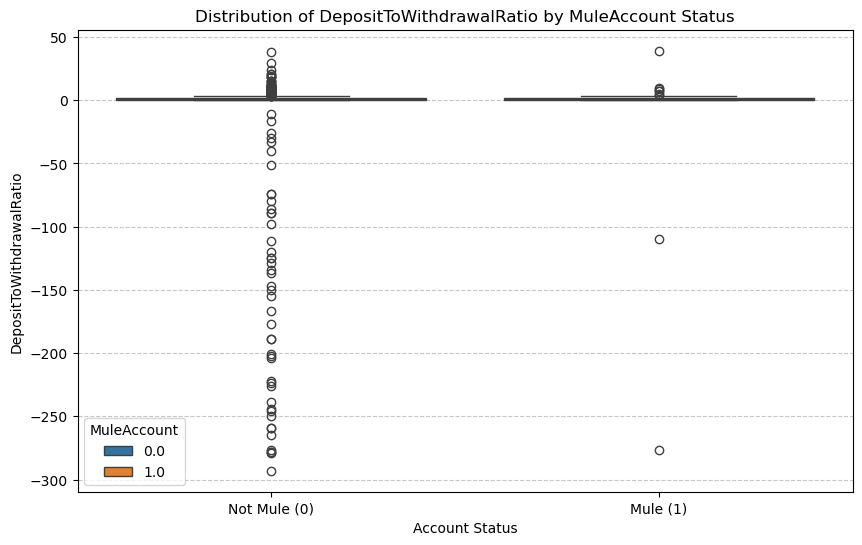

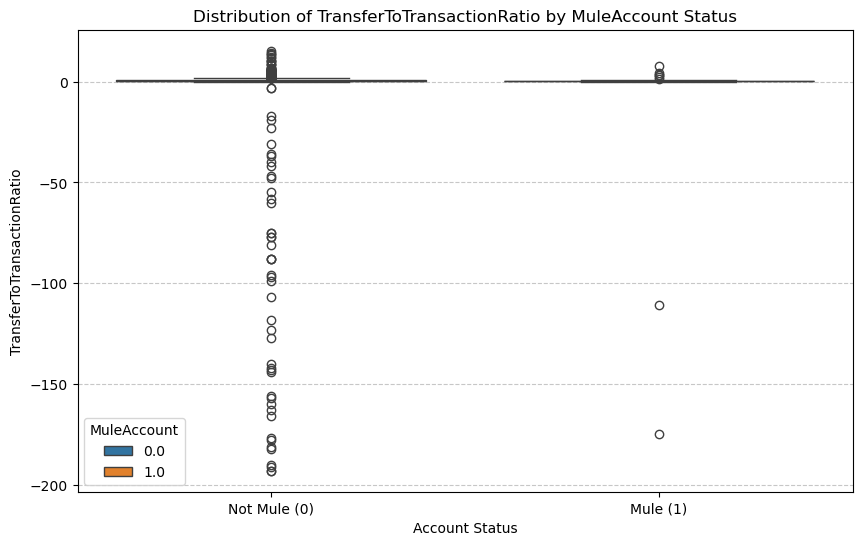

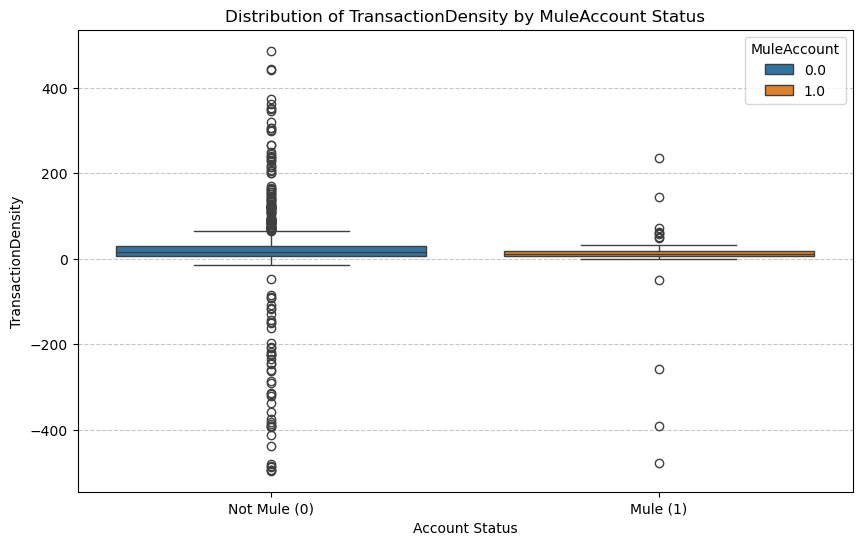

In [337]:
# Analyze key features against 'MuleAccount'

# Numerical features
numerical_features_to_plot = ['AverageBalance', 'NumTransactions', 'NumDeposits', 'NumWithdrawals',
                              'NumTransfers', 'CreditScore', 'Income', 'SocialMediaUsageHours',
                            'ShoppingFrequencyPerMonth', 'AccountLength', 'NumCreditCards', 'DepositToWithdrawalRatio',
                              'TransferToTransactionRatio', 'TransactionDensity']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='MuleAccount', y=feature, data=combined_data,  hue = 'MuleAccount')
    plt.title(f'Distribution of {feature} by MuleAccount Status')
    plt.xticks(ticks=[0, 1], labels=['Not Mule (0)', 'Mule (1)'])
    plt.xlabel('Account Status')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 


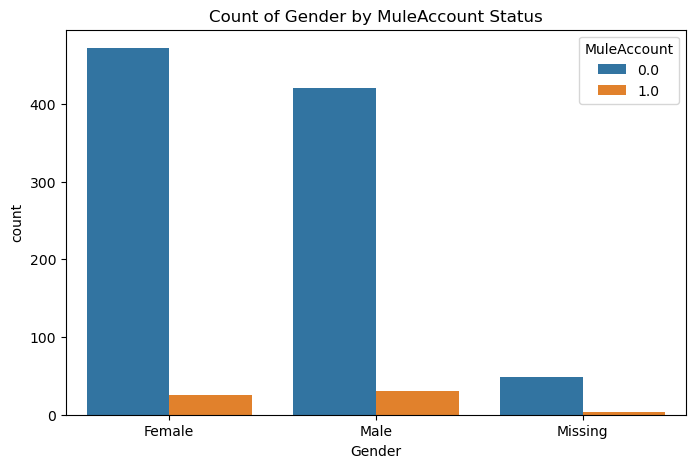

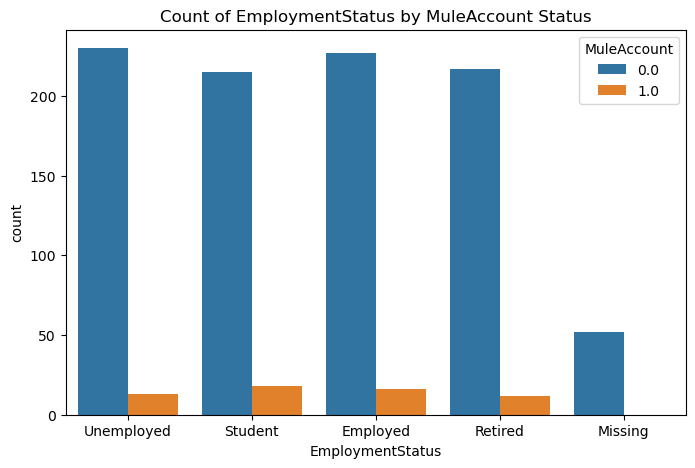

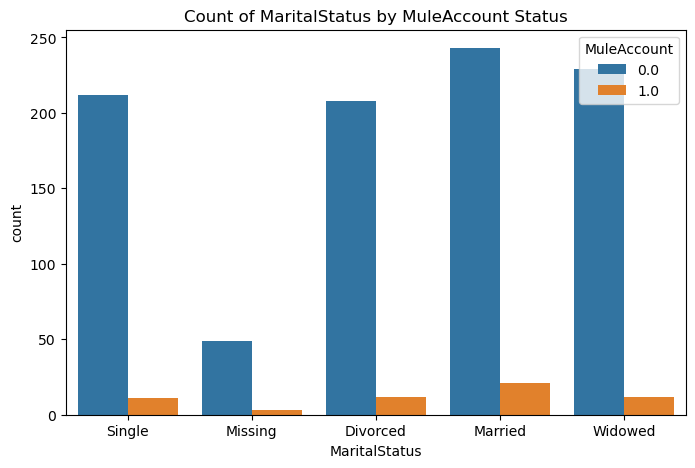

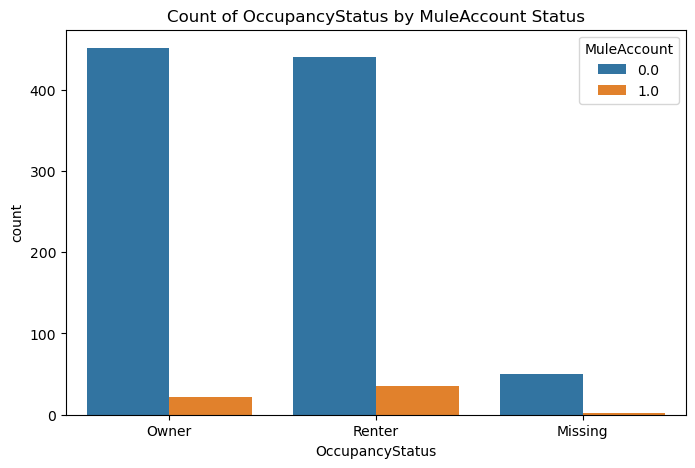

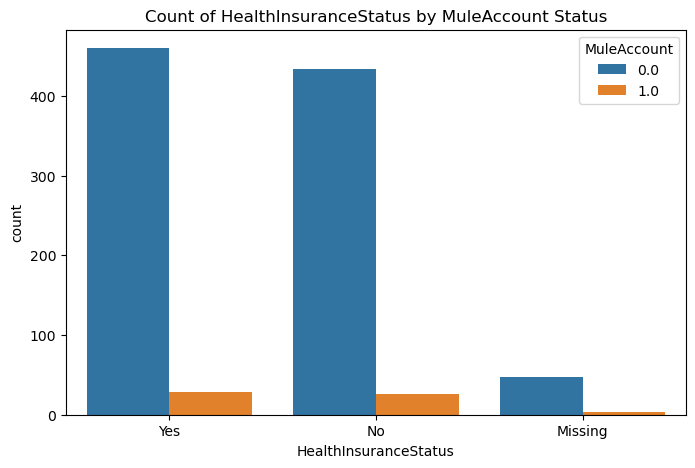

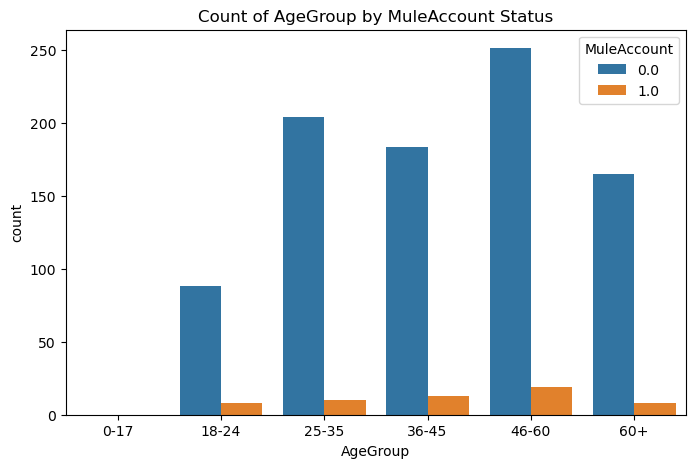

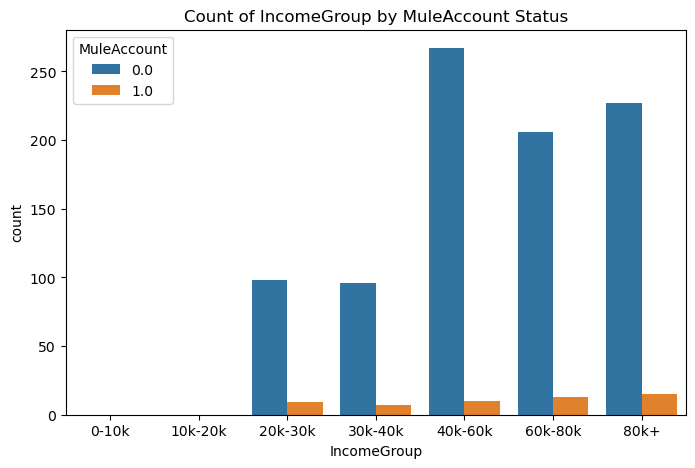

In [338]:
# Categorical features
categorical_features_to_plot = ['Gender', 'EmploymentStatus', 'MaritalStatus', 'OccupancyStatus', 'HealthInsuranceStatus', 'AgeGroup', 'IncomeGroup']

for feature in categorical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='MuleAccount', data=combined_data)
    plt.title(f'Count of {feature} by MuleAccount Status')
    plt.show()

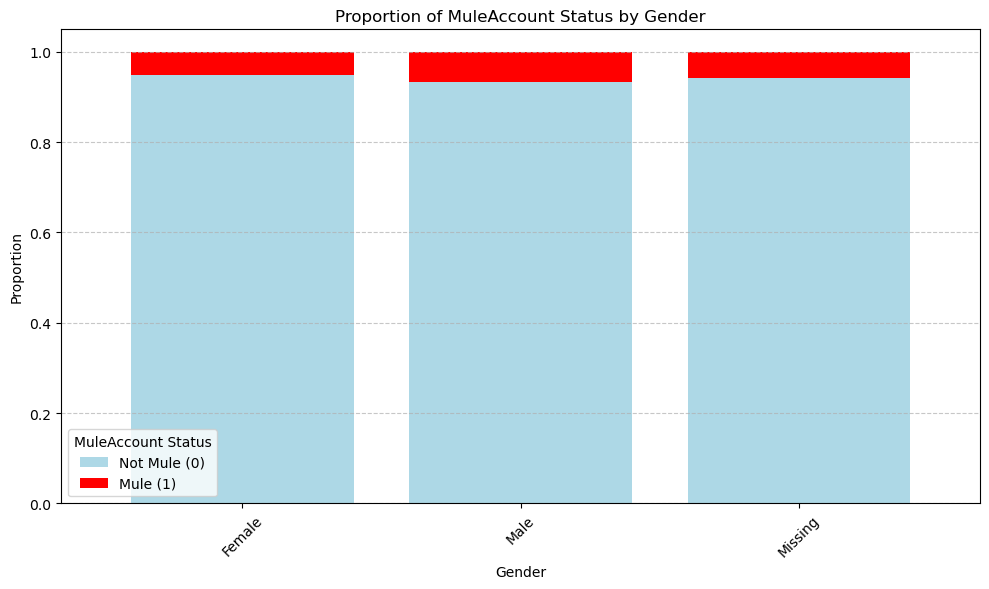

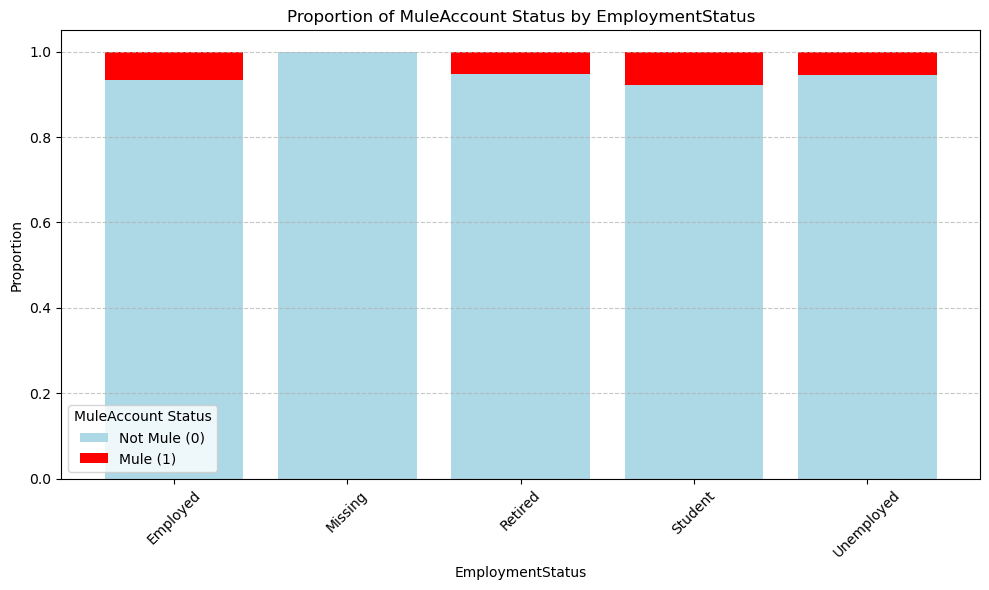

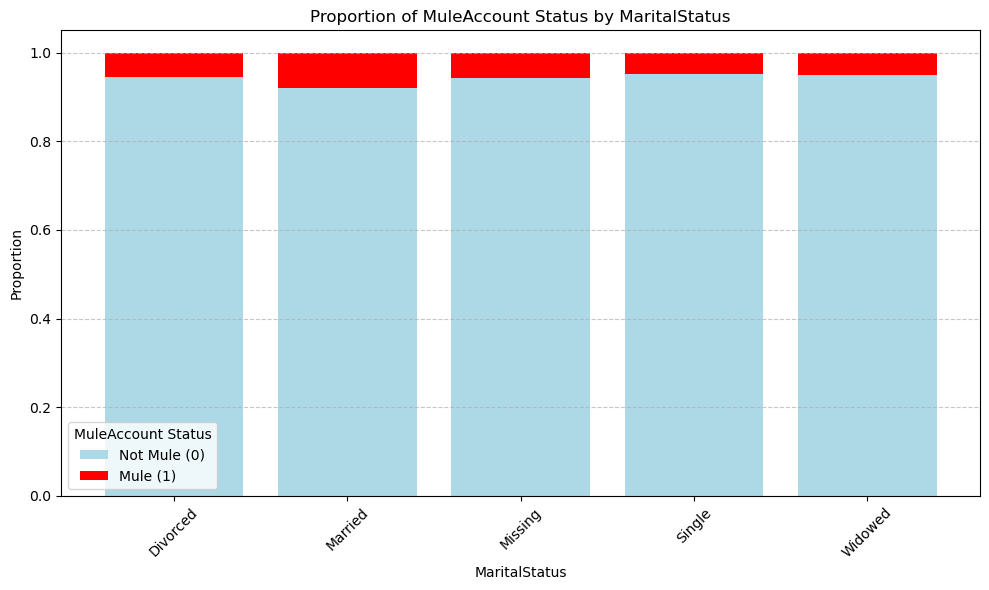

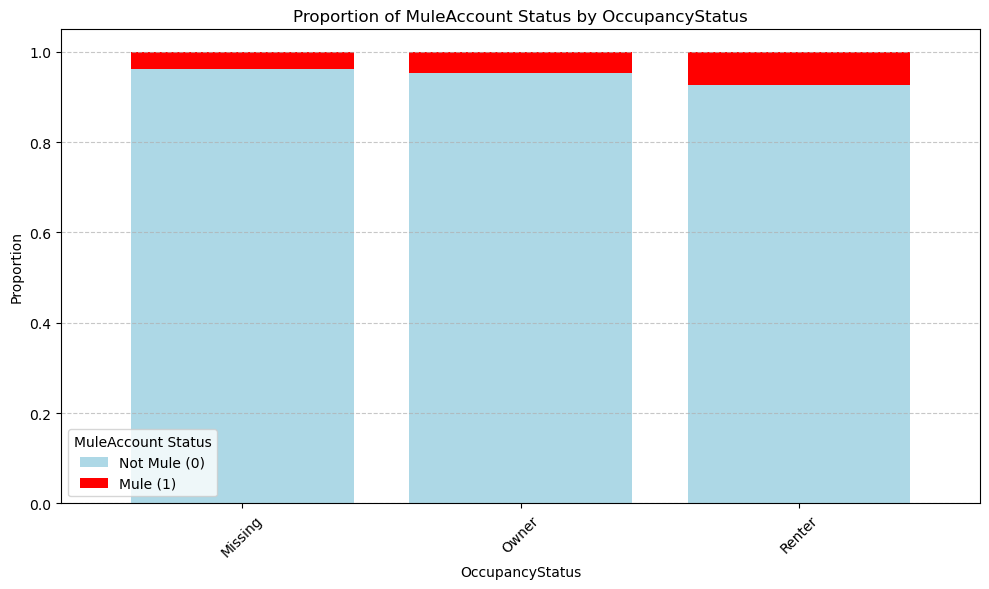

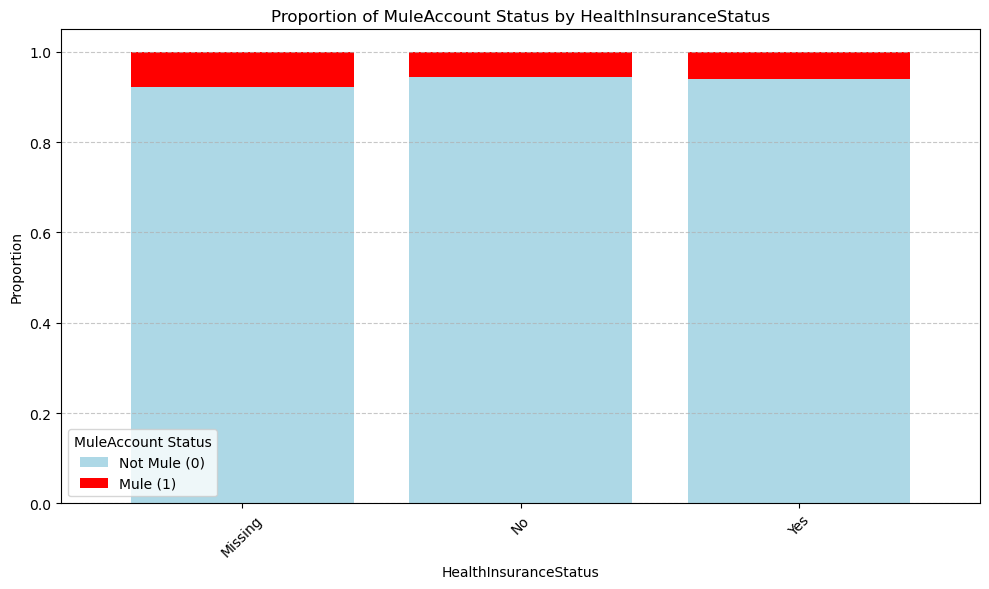

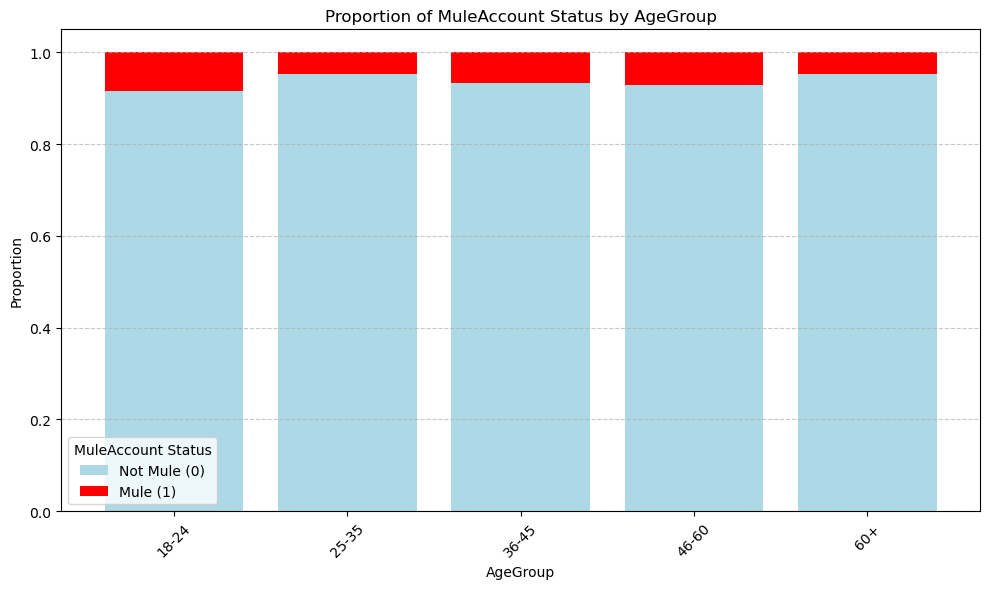

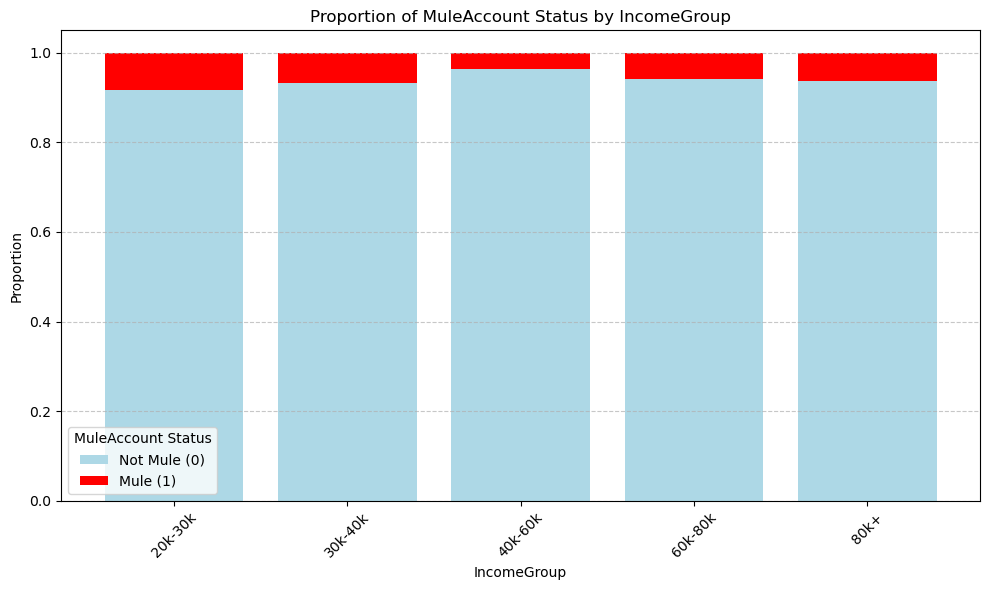

In [339]:
for feature in categorical_features_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Calculate proportions for each category
    cross_tab = pd.crosstab(combined_data[feature], combined_data['MuleAccount'], normalize='index')
    
    # Create a stacked bar plot showing proportions
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), 
                   color=['lightblue', 'red'], width=0.8)
    
    plt.title(f'Proportion of MuleAccount Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(['Not Mule (0)', 'Mule (1)'], title='MuleAccount Status')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()